# Portfolio Optimization

### Install and Import Packages

In [1]:
# install this package 
!pip install pandas-datareader

In [2]:
# import packages
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

### Gather Data From Yahoo Finanace

In [3]:
# Setting dates of data pull
startdate = '2017-01-01'
enddate = '2020-12-31'

# Apply Pandas DataReader
AMD = pdr.DataReader('AMD', 'yahoo', startdate, enddate)
AAPL = pdr.DataReader('AAPL', 'yahoo', startdate, enddate)
MSFT = pdr.DataReader('MSFT', 'yahoo', startdate, enddate)
ORCL = pdr.DataReader('ORCL', 'yahoo', startdate, enddate)

AMD.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,11.65,11.02,11.42,11.43,55182000,11.43
2017-01-04,11.52,11.24,11.45,11.43,40781200,11.43
2017-01-05,11.69,11.23,11.43,11.24,38855200,11.24
2017-01-06,11.49,11.11,11.29,11.32,34453500,11.32
2017-01-09,11.64,11.31,11.37,11.49,37304800,11.49


### Create a Portfolio of Selected Stocks

In [4]:
# Normalizing stock prices (cumulative return)
for stock in (AMD, AAPL, MSFT, ORCL):
    stock['Normalizing Return'] = stock['Adj Close']/stock.iloc[0]['Adj Close']

In [5]:
# Example of ORCL from the for loop
ORCL.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return
Date,,,,,,,
2017-01-03,38.689999,38.299999,38.450001,38.549999,11051300.0,35.401375,1.000000
2017-01-04,38.919998,38.549999,38.549999,38.740002,9545500.0,35.575851,1.004929
2017-01-05,38.950001,38.410000,38.669998,38.639999,12064700.0,35.484013,1.002334
2017-01-06,38.750000,38.380001,38.750000,38.450001,14829700.0,35.309540,0.997406
2017-01-09,39.450001,38.470001,38.529999,39.029999,15587900.0,35.842159,1.012451


In [6]:
# Setting weights
for stock, allo in zip((AMD, AAPL, MSFT, ORCL), [0.25, 0.25, 0.25, 0.25]):
    stock['Allocation'] = stock['Normalizing Return'] * allo

In [7]:
# Examining the allocation of a stock
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation
Date,,,,,,,,
2017-01-03,62.840000,62.130001,62.790001,62.580002,20694100.0,58.065456,1.000000,0.250000
2017-01-04,62.750000,62.119999,62.480000,62.299999,21340000.0,57.805649,0.995526,0.248881
2017-01-05,62.660000,62.029999,62.189999,62.299999,24876000.0,57.805649,0.995526,0.248881
2017-01-06,63.150002,62.040001,62.299999,62.840000,19922900.0,58.306705,1.004155,0.251039
2017-01-09,63.080002,62.540001,62.759998,62.639999,20382700.0,58.121120,1.000959,0.250240


In [8]:
# Assigning a value of $10,000 to the portfolio
for stock in (AMD, AAPL, MSFT, ORCL):
    stock['Position Value'] = stock['Allocation'] * 10000

In [9]:
# Examining the amount in AMD
AMD.head()

# Setting Up Portfolio Dollar Values

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation,Position Value
Date,,,,,,,,,
2017-01-03,11.65,11.02,11.42,11.43,55182000,11.43,1.000000,0.250000,2500.000000
2017-01-04,11.52,11.24,11.45,11.43,40781200,11.43,1.000000,0.250000,2500.000000
2017-01-05,11.69,11.23,11.43,11.24,38855200,11.24,0.983377,0.245844,2458.442579
2017-01-06,11.49,11.11,11.29,11.32,34453500,11.32,0.990376,0.247594,2475.940375
2017-01-09,11.64,11.31,11.37,11.49,37304800,11.49,1.005249,0.251312,2513.123242


In [10]:
# Create a list of all position values
position_values = [AMD['Position Value'], AAPL['Position Value'], MSFT['Position Value'], ORCL['Position Value']]

# Concatenate the list of position values
position_values = pd.concat(position_values, axis=1)

# Name columns
position_values.columns = ['AMD', 'AAPL', 'MSFT', 'ORCL']

# Add a total for entire portfolio
position_values['Total'] = position_values.sum(axis=1)
position_values.head()


,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2017-01-03,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2017-01-04,2500.000000,2497.201620,2488.814021,2512.321317,9998.336958
2017-01-05,2458.442579,2509.901409,2488.814021,2505.835775,9962.993784
2017-01-06,2475.940375,2537.882064,2510.386945,2493.514728,10017.724112
2017-01-09,2513.123242,2561.128008,2502.396608,2531.127637,10107.775495


<AxesSubplot:title={'center':'$10k Portfolio'}, xlabel='Date'>

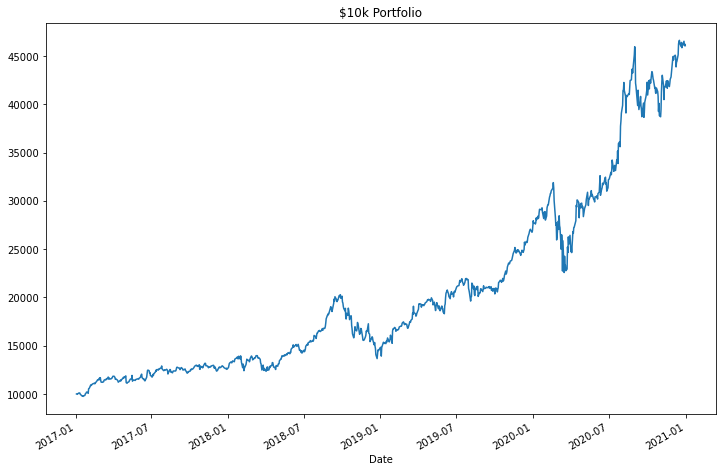

In [11]:
# Plot total portfolio
position_values['Total'].plot(figsize = (12,8), title = '$10k Portfolio')

<AxesSubplot:title={'center':'Individual Stocks form Portfolio'}, xlabel='Date'>

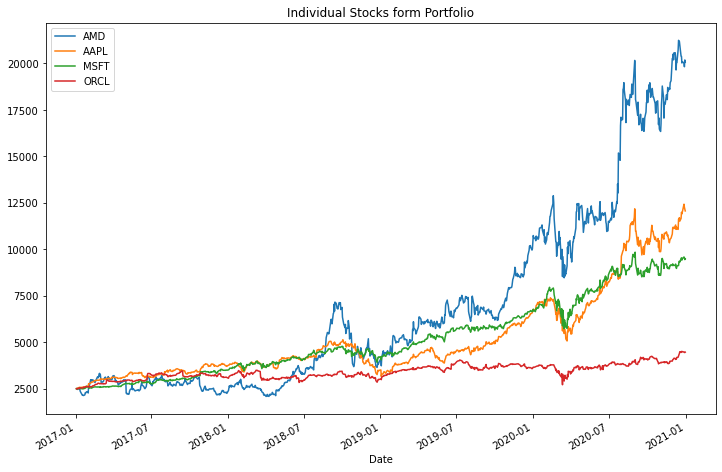

In [12]:
# Plotting each stock within portfolio
position_values.drop('Total', axis=1).plot(figsize = (12,8), title = 'Individual Stocks form Portfolio')

In [13]:
# Cumulative portfolio return in terms of percent
cumulative_return = (position_values['Total'][-1]/position_values['Total'][0] - 1) * 100
cumulative_return

360.6330269091409

### Daily Returns

In [14]:
# Calculating daily returns
position_values['Daily Returns'] = position_values['Total'].pct_change(1)
position_values.head()

,AMD,AAPL,MSFT,ORCL,Total,Daily Returns
Date,,,,,,
2017-01-03,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2017-01-04,2500.000000,2497.201620,2488.814021,2512.321317,9998.336958,-0.000166
2017-01-05,2458.442579,2509.901409,2488.814021,2505.835775,9962.993784,-0.003535
2017-01-06,2475.940375,2537.882064,2510.386945,2493.514728,10017.724112,0.005493
2017-01-09,2513.123242,2561.128008,2502.396608,2531.127637,10107.775495,0.008989


In [17]:
# Average daily return
position_values['Daily Returns'].mean()

0.0017151858030128775

In [18]:
# Standard deviation
position_values['Daily Returns'].std()

0.01977868484190256

In [20]:
# Sharpe ratio (assuming Risk Free Rate to be close to zero)
sharpe_ratio = position_values['Daily Returns'].mean() / position_values['Daily Returns'].std()
sharpe_ratio

0.08671890050945823

In [21]:
# Annualize Sharpe ratio
sharpe_ratio_annualized = (252**0.5) * sharpe_ratio
sharpe_ratio_annualized

1.3766198683018736

### Set Up for Portfolio Optimization

In [24]:
# concatenate stocks and rename columns
stocks = pd.concat([AMD['Adj Close'], AAPL['Adj Close'], MSFT['Adj Close'], ORCL['Adj Close']], axis=1)
stocks.columns = ['AMD', 'AAPL', 'MSFT', 'ORCL']
stocks.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2017-01-03,11.43,27.297691,58.065456,35.401375
2017-01-04,11.43,27.267136,57.805649,35.575851
2017-01-05,11.24,27.405806,57.805649,35.484013
2017-01-06,11.32,27.711329,58.306705,35.309540
2017-01-09,11.49,27.965153,58.121120,35.842159


In [25]:
# Converting to percent change
stocks_return = stocks.pct_change(1)
stocks_return.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.000000,-0.001119,-0.004474,0.004929
2017-01-05,-0.016623,0.005086,0.000000,-0.002581
2017-01-06,0.007117,0.011148,0.008668,-0.004917
2017-01-09,0.015018,0.009160,-0.003183,0.015084


### Prepare variables for Portfolio Optimization

In [26]:
# Setting up for 10k different portfolio weighting combinations
number_ports = 10000
all_weights = np.zeros((number_ports, len(stocks.columns)))
all_weights                       

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [29]:
# Preallocating space for portfolio calculations
returns_array = np.zeros(number_ports)
volatility_array = np.zeros(number_ports)
sharpe_array = np.zeros(number_ports)

### Calculate Portfolio Combinations

In [32]:
# For replication from randomizer
import random
random.seed(3)
# Fun fact, different randomizer for numpy
np.random.seed(3)

# For loop
for index in range(number_ports):
    #generate random weights
    numbers = np.array(np.random.random(4))
    weights = numbers / np.sum(numbers)
    
    #save weights
    all_weights[index, :] = weights
    
    #expected return
    returns_array[index] = np.sum(stocks_return.mean() * 252 * weights)
    
    #expected volatility = square root(Weights-Transposed * Covariance Matrix * Weights)
    volatility_array[index] = np.sqrt(np.dot(weights.T, np.dot(stocks_return.cov() * 252, weights)))
    
    #Sharpe ratio
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [33]:
#Print all weight combinations
print("All Weights:", all_weights)

#Print first weights
print("First Combination:", all_weights[0])

All Weights: [[0.26728964 0.34364796 0.14116943 0.24789297]
 [0.42079088 0.4223677  0.05918062 0.0976608 ]
 [0.05257192 0.45027163 0.03051749 0.46663895]
 ...
 [0.24310268 0.59296095 0.10174269 0.06219368]
 [0.52470347 0.17948521 0.08528315 0.21052817]
 [0.07789859 0.36983939 0.37856788 0.17369413]]
First Combination: [0.26728964 0.34364796 0.14116943 0.24789297]


In [34]:
#Print all Sharpe ratios
print("All Sharpe Ratios:", all_weights)

#Print first Sharpe ratio
print("Sharpe ratio of first portfolio:", all_weights[0])

All Sharpe Ratios: [[0.26728964 0.34364796 0.14116943 0.24789297]
 [0.42079088 0.4223677  0.05918062 0.0976608 ]
 [0.05257192 0.45027163 0.03051749 0.46663895]
 ...
 [0.24310268 0.59296095 0.10174269 0.06219368]
 [0.52470347 0.17948521 0.08528315 0.21052817]
 [0.07789859 0.36983939 0.37856788 0.17369413]]
Sharpe ratio of first portfolio: [0.26728964 0.34364796 0.14116943 0.24789297]


### Portfolio Weights of Highest Sharpe Ratio

In [35]:
#Find highest Sharpe ratio
sharpe_array.max()

1.5386936406273481

In [36]:
#Find by index
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

9041

In [40]:
#Taking weights of the best portfolio
print(all_weights[index_max_sharpe, :])
print(stocks.columns)

[0.20595086 0.4377708  0.35470386 0.00157448]
Index(['AMD', 'AAPL', 'MSFT', 'ORCL'], dtype='object')


### Plot Efficient Frontier

Text(0, 0.5, 'Returns')

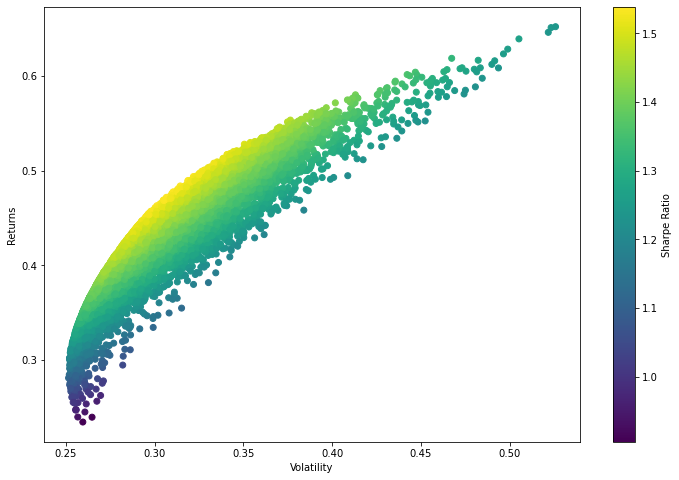

In [43]:
# plot heatmap
plt.figure(figsize=(12,8))
plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')

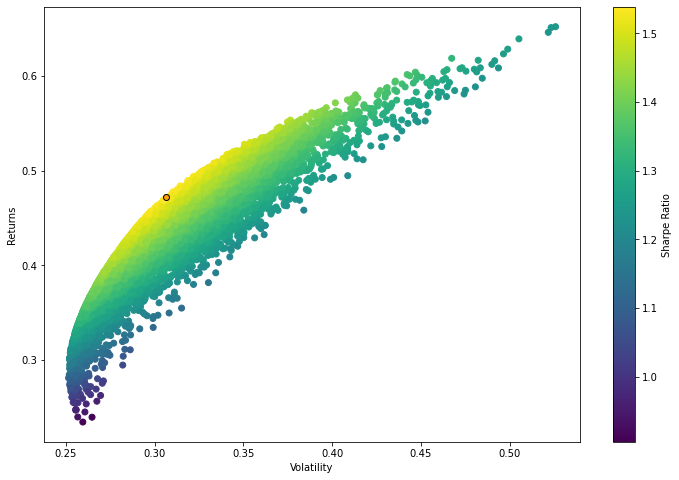

In [47]:
#Plot optimal portfolio
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_vaolatility = volatility_array[index_max_sharpe]

# Plot heatmap
plt.figure(figsize=(12,8))
plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')

# Add orange dot for easy viewing
plt.scatter(max_sharpe_vaolatility, max_sharpe_return, c='orange', edgecolors='black')